In [1]:
#install Seaborn package. Comment after running once.
!pip install seaborn
!pip install statsmodels
!pip install -q datascience                                       
!pip install -q pandas-profiling
print('Installed...')

Installed...


In [2]:
# Import Dependencies
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
import seaborn as sns                                             
%matplotlib inline
sns.set()
import datetime
from subprocess import check_output
import scipy as sp 
from scipy import stats
from scipy.stats import norm

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\vbhak\\Downloads'

In [5]:
os.listdir() 

['.ipynb_checkpoints',
 '01-Data-Dictionary (1).docx',
 '05801140003660_1626261160366.pdf',
 '05801140003660_1626323624594.pdf',
 '1-s2.0-S0735109703012002-main.pdf',
 '1-s2.0-S0914508716302064-main.pdf',
 '1-s2.0-S2211715620300229-main.pdf',
 '1. Missing Value Treatment',
 '2 FINAL -Complete. Feature_Engineering - FINAL.ipynb',
 '2. Feature Engineering',
 '2013_Book_AppliedPredictiveModeling.pdf',
 '2017_Book_AnIntroductionToMachineLearnin.pdf',
 '2020-1201 20210530 - Dec, Jan 2021 - doing LogR ourselves.ipynb',
 '2020-1201 20210620 NEW - term 5 - PCA (updated).ipynb',
 '2020-1201 20210620 NEW - term 5 - PCA (updated1).ipynb',
 '3420-Article Text-6587-1-10-20201223.pdf',
 '6boqAczSVyWaPRdI6Up4_Solutions-1571117514782 (1).ipynb',
 'Abalone adult prediction quiz .ipynb',
 'Abalone LR.ipynb',
 'Abalone_profiling_before_preprocessing.html',
 'abalone_test.csv',
 'abalone_train.csv',
 'AD-Test_Calculator.xls',
 'adult_dataset.ipynb',
 'AdvancedFeatureEngineering-200905-225732',
 'advs.2020

In [6]:

# 2. Load data
avocado_train = pd.DataFrame(pd.read_csv("C:/Users/vbhak/Downloads/avocado_train.csv", index_col = 0))        # Avacado data for training is loaded
avocado_test = pd.DataFrame(pd.read_csv("C:/Users/vbhak/Downloads/avocado_test.csv", index_col = 0 ))   # Avacado data for testing is loaded

In [7]:
# 3. Check the head of the train data (first few rows)
avocado_train.head()
# 3. Check the head of the test data (first few rows)
avocado_test.head()

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Id,,,,,,,,,,,,
11137,2015-05-03,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,organic,2015,RichmondNorfolk
16503,2017-10-08,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,organic,2017,PhoenixTucson
6438,2017-07-02,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,conventional,2017,GreatLakes
8247,2017-05-14,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,conventional,2017,Syracuse
10481,2015-12-13,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,organic,2015,Nashville


In [8]:
avocado_train.rename(columns = {'4046':'size_a','4225':'size_b','4770':'size_c'}, inplace = True)

avocado_test.rename(columns = {'4046':'size_a','4225':'size_b','4770':'size_c'}, inplace = True)

In [9]:
# 4. Check for missing values

avocado_test.isnull().any()


Date            False
Total Volume    False
size_a          False
size_b          False
size_c          False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [10]:
 #Check for missing values
avocado_train.isnull().sum()


Date            0
AveragePrice    0
Total Volume    0
size_a          0
size_b          0
size_c          0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
print(avocado_train.shape)
print(avocado_test.shape)

(14599, 13)
(3650, 12)


In [12]:
# 5. Summary Statistics
avocado_train.describe()

,AveragePrice,Total Volume,size_a,size_b,size_c,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000
mean,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236,2016.146174
std,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157,0.937565
min,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000,2015.000000
50%,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000,2016.000000
75%,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000,2017.000000
max,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


 **Observations**
- XLarge Bags

In [13]:
# 5. Summary Statistics
avocado_test.describe()

,Total Volume,size_a,size_b,size_c,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3650.000000,3650.000000
mean,9.985644e+05,3.499917e+05,3.417070e+05,2.717581e+04,2.796875e+05,2.124299e+05,6.370799e+04,3549.613236,2016.154795
std,4.032615e+06,1.473789e+06,1.398324e+06,1.250919e+05,1.142301e+06,8.626779e+05,2.789935e+05,19131.611332,0.949469
min,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.102260e+04,8.848725e+02,2.938223e+03,0.000000e+00,5.284002e+03,2.942858e+03,1.088600e+02,0.000000,2015.000000
50%,1.100332e+05,9.726290e+03,2.960670e+04,2.063600e+02,4.000460e+04,2.666419e+04,2.831680e+03,0.000000,2016.000000
75%,4.628083e+05,1.204247e+05,1.654237e+05,6.666458e+03,1.193041e+05,8.490868e+04,2.463901e+04,147.990000,2017.000000
max,6.103446e+07,2.274362e+07,2.032816e+07,1.800066e+06,1.629830e+07,1.256716e+07,3.789723e+06,377661.060000,2018.000000


In [14]:
#6. to understand skew in all variables and see if y variable has a normal distribution
display(avocado_train.skew())
display(avocado_test.skew())

AveragePrice     0.581313
Total Volume     9.279850
size_a           8.854903
size_b           9.213700
size_c          10.603288
Total Bags      10.126847
Small Bags       9.867414
Large Bags      10.235405
XLarge Bags     13.809064
year             0.213583
dtype: float64

Total Volume     8.064152
size_a           7.864631
size_b           8.012150
size_c           8.803430
Total Bags       8.579959
Small Bags       8.472631
Large Bags       8.466219
XLarge Bags     11.022514
year             0.221634
dtype: float64

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='XLarge Bags'>

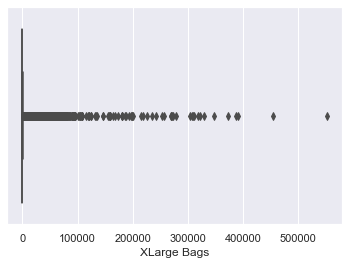

In [15]:
sns.boxplot(avocado_train['XLarge Bags'])

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='XLarge Bags'>

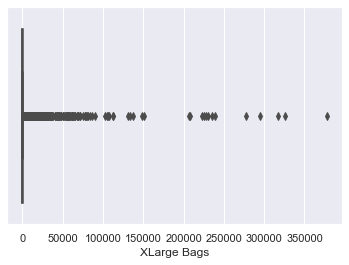

In [16]:
sns.boxplot(avocado_test['XLarge Bags'])

In [17]:
columns = avocado_train.columns #understand dash, question mark or unique values etc Univariate/Features
for i in columns:
    print(str(i)+"'s Unique count "+str(len(avocado_train[str(i)].value_counts())))
    print(f"{avocado_train[str(i)].value_counts()}\n")

Date's Unique count 169
2017-07-09    99
2016-08-07    97
2017-08-20    95
2016-03-06    95
2015-11-15    94
              ..
2016-04-17    77
2017-05-21    77
2016-04-03    76
2018-03-25    75
2015-05-24    75
Name: Date, Length: 169, dtype: int64

AveragePrice's Unique count 256
1.15    168
1.18    164
1.26    158
1.19    156
1.59    154
       ... 
2.92      1
2.91      1
3.12      1
2.97      1
0.46      1
Name: AveragePrice, Length: 256, dtype: int64

Total Volume's Unique count 14592
2858.31      2
4103.97      2
7223.46      2
3288.85      2
3713.49      2
            ..
31954.94     1
604082.24    1
21533.64     1
12209.90     1
21545.16     1
Name: Total Volume, Length: 14592, dtype: int64

size_a's Unique count 14190
0.00          192
3.00           10
1.00            8
1.24            6
1.25            6
             ... 
420151.75       1
1638639.18      1
583.70          1
417.29          1
16.74           1
Name: size_a, Length: 14190, dtype: int64

size_b's Unique count 

**Observations**
- Total Bags havee 13 zeros
- Small Bags have 129 zeros
- Large Bags have 1871 zeros
- X-Large bags have 9649 values as zeros (calculate % zeros in total 14599 of train dataset)

In [18]:
#Total percent data available
(14599-9649)*100/14599


33.906431947393656

In [19]:

avocado_test.drop(labels=['XLarge Bags'],axis=1,inplace=True)

In [20]:
#8. understand Univariate/Features
avocado_train['AveragePrice'].value_counts()

1.15    168
1.18    164
1.26    158
1.19    156
1.59    154
       ... 
2.92      1
2.91      1
3.12      1
2.97      1
0.46      1
Name: AveragePrice, Length: 256, dtype: int64

In [21]:
avocado_train.drop(labels=['XLarge Bags'],axis=1,inplace=True)

<AxesSubplot:>

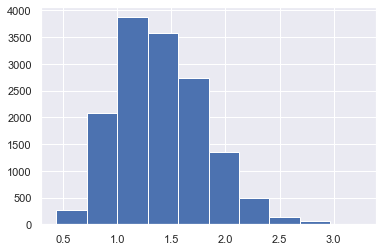

In [22]:
#9. Visualize Univariate
avocado_train['AveragePrice'].hist()

<AxesSubplot:>

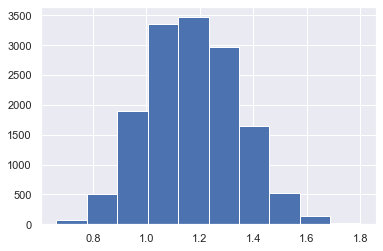

In [23]:
#10. LR Assumption, TV normally distributed 
np.sqrt(avocado_train['AveragePrice']).hist()

<AxesSubplot:>

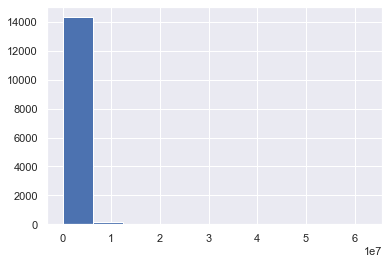

In [24]:
avocado_train['Total Volume'].hist()

<AxesSubplot:>

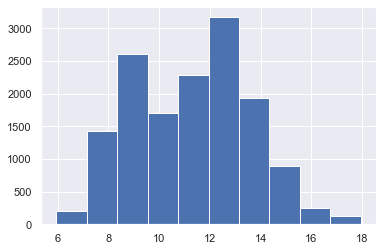

In [25]:
#11. if not log transform and check
np.log1p(avocado_train['Total Volume']).hist()

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


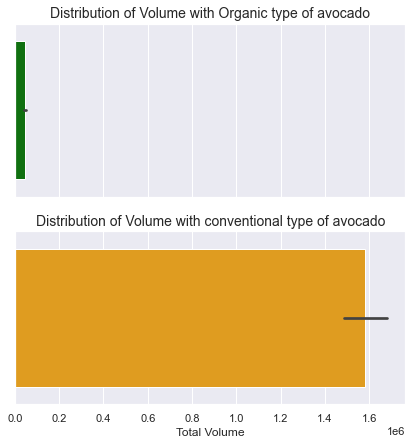

In [26]:
# Slicing data with organic 
organic = avocado_train['Total Volume'][avocado_train['type'] == 'organic']

# Slicing data with not organic
Not_organic = avocado_train['Total Volume'][avocado_train['type'] == 'conventional']

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (7, 7))
sns.barplot(organic, ax=ax1,color='green')
ax1.set_title(label = 'Distribution of Volume with Organic type of avocado', size = 14)
ax1.set_xlabel(xlabel = '')
sns.barplot(Not_organic, ax=ax2, color= 'orange')
ax2.set_title(label = 'Distribution of Volume with conventional type of avocado', size = 14)
plt.show()



C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


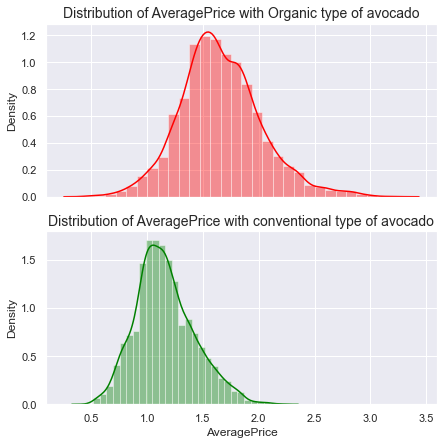

In [27]:
# Slicing data with organic 
organic = avocado_train['AveragePrice'][avocado_train['type'] == 'organic']

# Slicing data with not organic
Not_organic = avocado_train['AveragePrice'][avocado_train['type'] == 'conventional']

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (7, 7))
sns.distplot(a = organic,bins=30, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of AveragePrice with Organic type of avocado', size = 14)
ax1.set_xlabel(xlabel = 'type')
sns.distplot(a = Not_organic,bins=30, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of AveragePrice with conventional type of avocado', size = 14)
plt.show()


<AxesSubplot:xlabel='region', ylabel='Total Bags'>

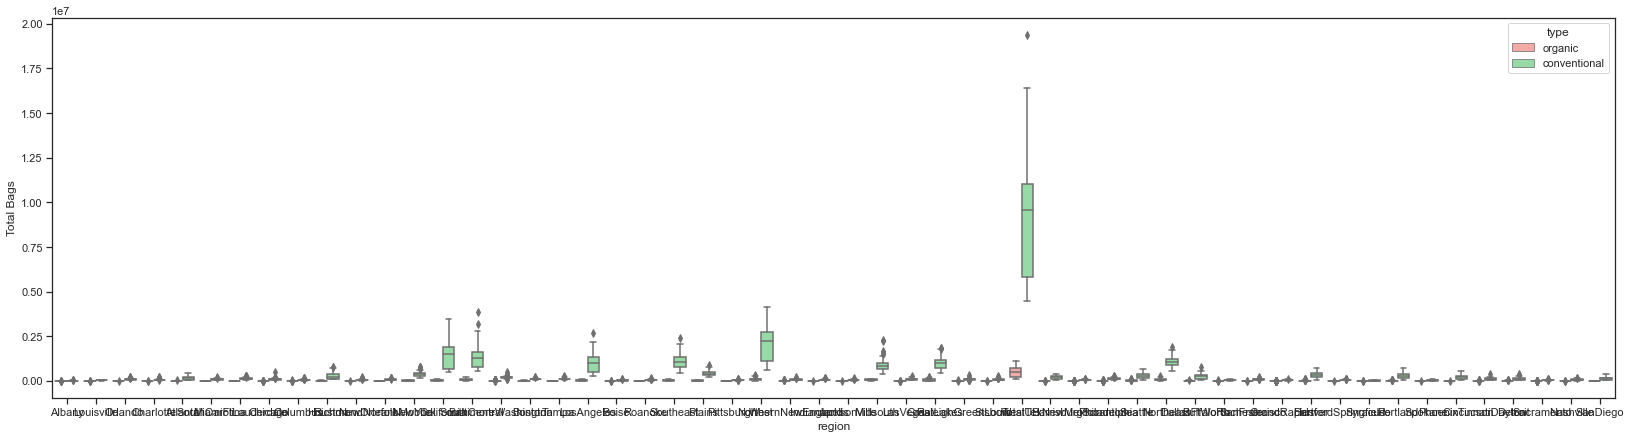

In [28]:
from matplotlib import pyplot as plt
plt.figure(figsize=(28,7))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="region", y="Total Bags",
            hue="type", palette=["r", "g"],
            data=avocado_train)


In [29]:
avocado_train.drop(labels=['year','Date'],axis=1, inplace=True)
avocado_test.drop(labels=['year','Date'],axis=1, inplace=True)

<AxesSubplot:>

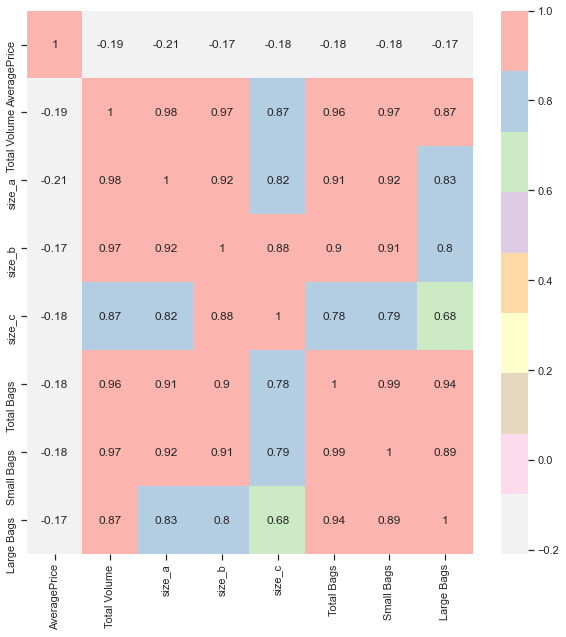

In [30]:
# 12. Check for Multicollinearity

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(avocado_train.corr(),annot=True, cmap='Pastel1_r') #for all columns,in a small dataset



**Observations**
- looks like too many variables are highly correlated 
- Total Volume is highly correlated to size a, b,c and Total bags to varying size bags data and can be dropped
- one variable Total Volume alone to be retained along with type and region for price prediction

<AxesSubplot:>

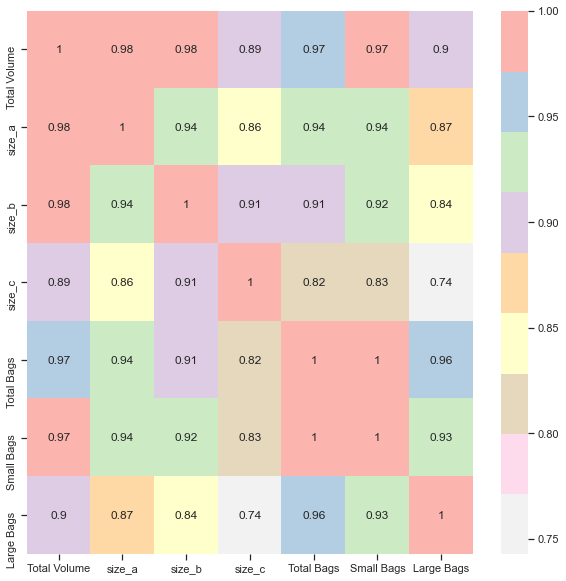

In [31]:
# 12. Check for Multicollinearity

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(avocado_test.corr(),annot=True, cmap='Pastel1_r') #for all columns,in a small dataset


Text(0.5, 1.0, 'plot of Average Price w.r.t Total Volume')

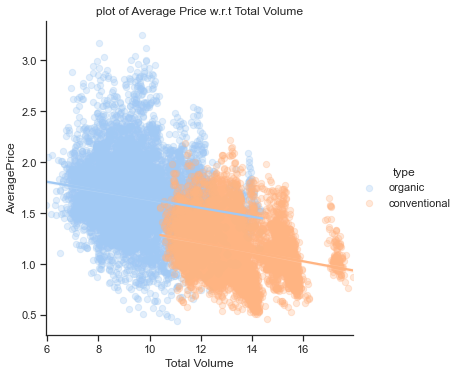

In [32]:
np.sqrt(avocado_train['AveragePrice'])
avocado_train['Total Volume']=np.log1p(avocado_train['Total Volume'])
sns.lmplot(x='Total Volume', y='AveragePrice', data=avocado_train, fit_reg=True, hue="type", scatter_kws={"marker": "o",'alpha':0.3, "s": 40})
plt.title('plot of Average Price w.r.t Total Volume')

Text(0.5, 1.0, 'plot of Average Price w.r.t Total Volume')

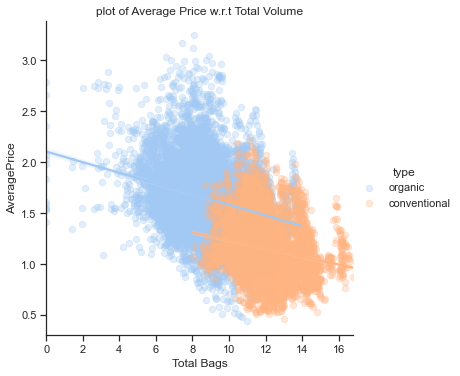

In [33]:
np.sqrt(avocado_train['AveragePrice'])
avocado_train['Total Bags']=np.log1p(avocado_train['Total Bags'])
sns.lmplot(x='Total Bags', y='AveragePrice', data=avocado_train, fit_reg=True, hue="type", scatter_kws={"marker": "o",'alpha':0.3, "s": 40})
plt.title('plot of Average Price w.r.t Total Volume')

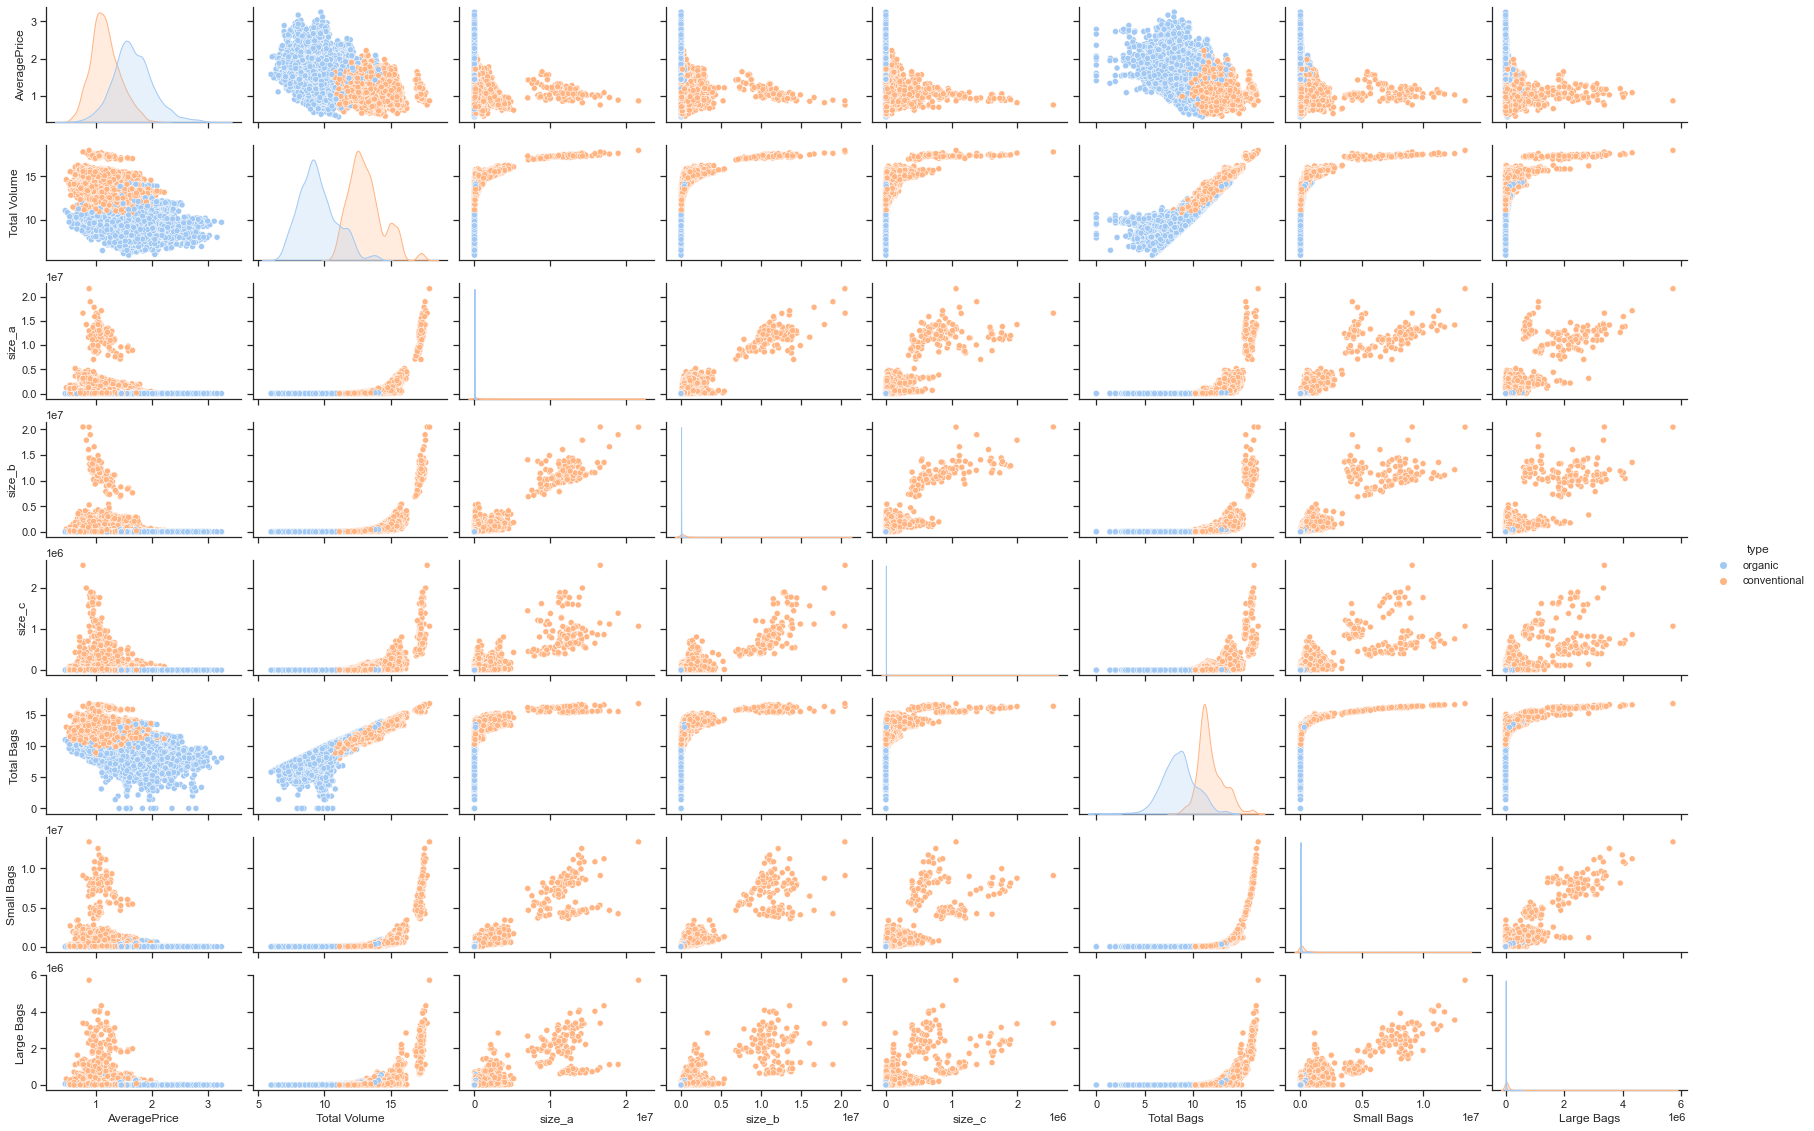

In [34]:
#13. Check for Linearity

np.sqrt(avocado_train['AveragePrice'])
sns.pairplot(data=avocado_train,height=2,aspect=1.5, diag_kind='kde',hue='type')

In [35]:
#14. Feature Engineering
#transformations , additions, multiplications, inverse relations etc

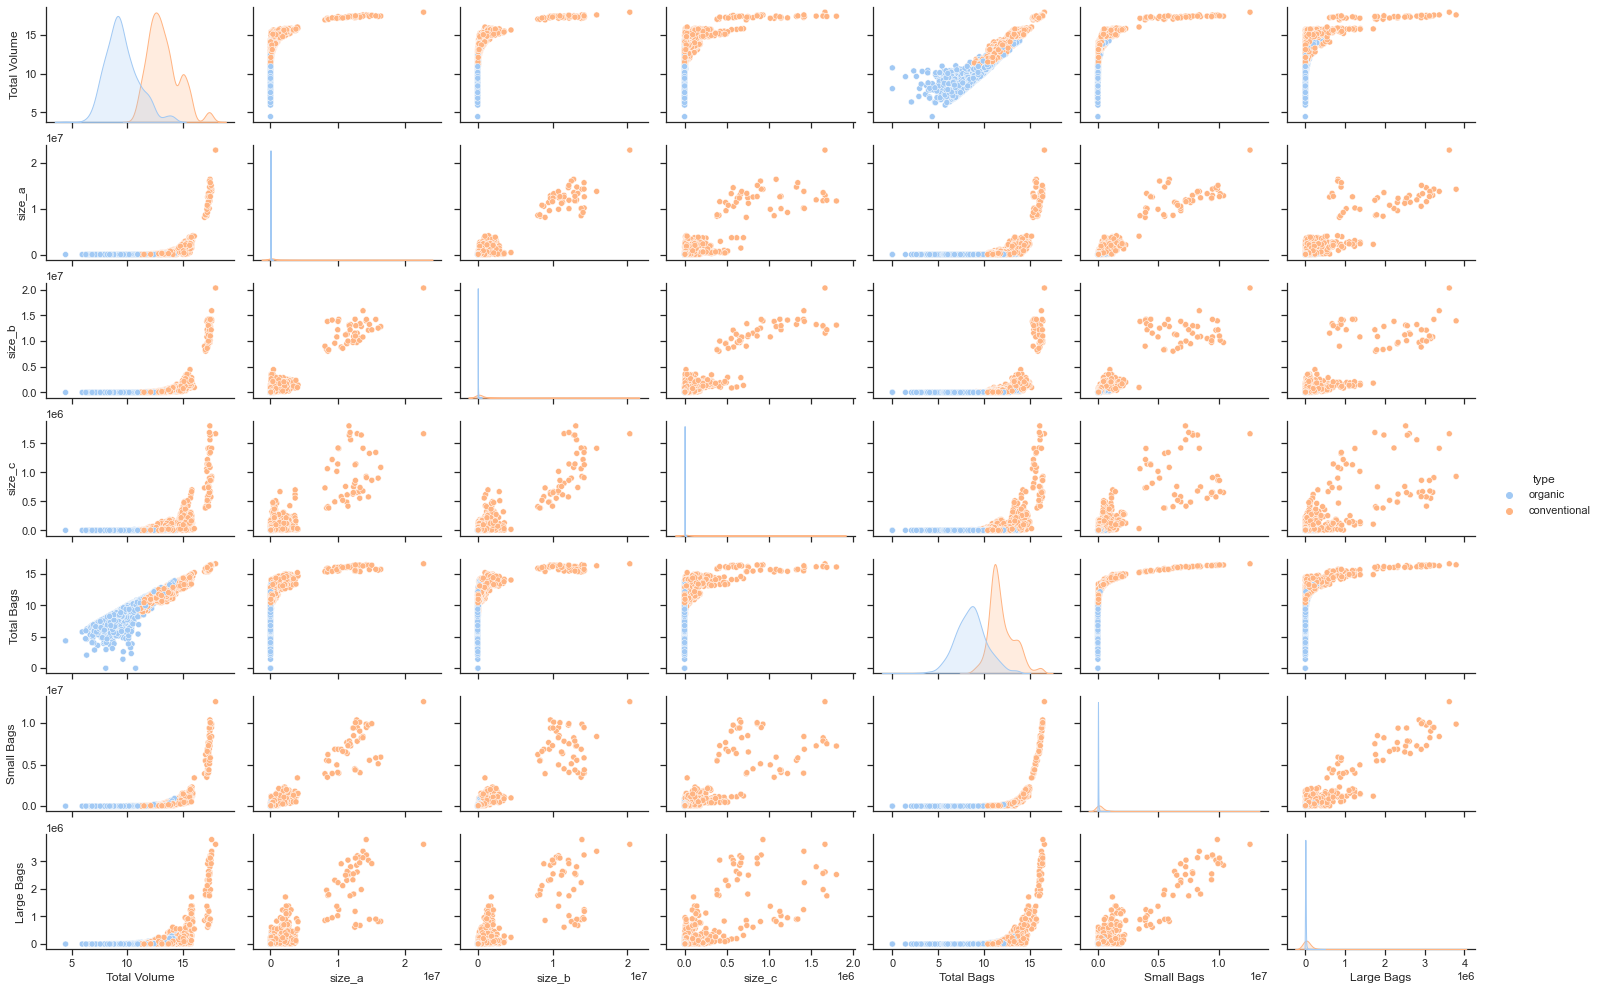

In [36]:
avocado_test['Total Volume']=np.log1p(avocado_test['Total Volume'])
avocado_test['Total Bags']=np.log1p(avocado_test['Total Bags'])
sns.pairplot(data=avocado_test,height=2,aspect=1.5, diag_kind='kde',hue='type')

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


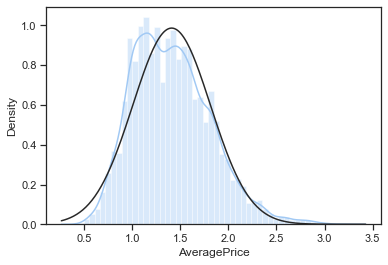

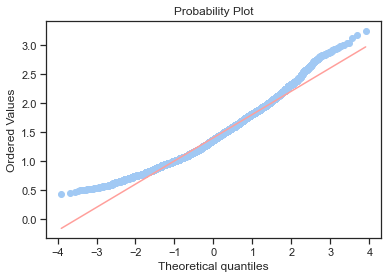

In [37]:
np.sqrt(avocado_train['AveragePrice'])
sns.distplot(avocado_train['AveragePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(avocado_train['AveragePrice'], plot=plt)

In [38]:

#15. label encoding 
avocado_train=pd.get_dummies(avocado_train, columns=['region','type'], drop_first=True)
avocado_test=pd.get_dummies(avocado_test, columns=['region','type'], drop_first=True)

<AxesSubplot:>

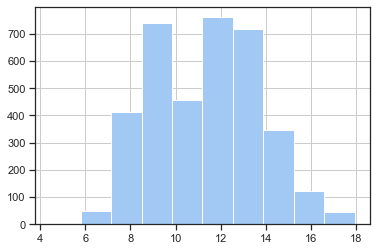

In [39]:
avocado_test['Total Volume'].hist()

In [40]:
print(avocado_train.skew())
display(avocado_test.skew())

AveragePrice                0.581313
Total Volume                0.081413
size_a                      8.854903
size_b                      9.213700
size_c                     10.603288
                             ...    
region_Tampa                6.946538
region_TotalUS              7.444784
region_West                 7.205046
region_WestTexNewMexico     7.079320
type_organic                0.000411
Length: 62, dtype: float64


Total Volume               0.109249
size_a                     7.864631
size_b                     8.012150
size_c                     8.803430
Total Bags                -0.163528
                             ...   
region_Tampa               8.120151
region_TotalUS             6.207548
region_West                6.910413
region_WestTexNewMexico    7.609049
type_organic               0.000000
Length: 61, dtype: float64

In [41]:
#dropping the columns which are not useful
avocado_train.drop(labels=['size_a','size_b','size_c','Total Bags','Small Bags','Large Bags'], axis=1, inplace=True)
avocado_test.drop(labels=['size_a','size_b','size_c','Total Bags','Small Bags','Large Bags'], axis=1, inplace=True)

In [42]:
#filling in zero values with train statistics
#avocado_train=(avocado_train['Total Bags'].groupby('type').transform(lambda x: x.fillna(x.median())))

In [43]:
#checking after filling NaN
#print(" \nCount total NaN at each column in a DataFrame : \n\n",
 #     avocado_train.isnull().sum())

In [44]:
#16.Prepare x, y variables
X=avocado_train.loc[:,avocado_train.columns!='AveragePrice']
print(X.head())
y=avocado_train['AveragePrice']
print(y.head())



       Total Volume  region_Atlanta  region_BaltimoreWashington  region_Boise  \
Id                                                                              
14761      7.857512               0                           0             0   
6843      11.521013               0                           0             0   
7306      12.971768               0                           0             0   
12329      8.600460               0                           0             0   
12036      8.633213               1                           0             0   

       region_Boston  region_BuffaloRochester  region_California  \
Id                                                                 
14761              0                        0                  0   
6843               0                        0                  0   
7306               0                        0                  0   
12329              0                        0                  0   
12036              0    

In [45]:
display(X.columns)

Index(['Total Volume', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region_RaleighGreensboro',
       'region_RichmondNorfolk', 'region_Roanoke', 'region_Sacramento',
       'reg

In [46]:
# Create a model to test using the following features

features_to_use = ['Total Volume', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region_RaleighGreensboro',
       'region_RichmondNorfolk', 'region_Roanoke', 'region_Sacramento',
       'region_SanDiego', 'region_SanFrancisco', 'region_Seattle',
       'region_SouthCarolina', 'region_SouthCentral', 'region_Southeast',
       'region_Spokane', 'region_StLouis', 'region_Syracuse', 'region_Tampa',
       'region_TotalUS', 'region_West', 'region_WestTexNewMexico',
       'type_organic']
X_test = avocado_test[features_to_use]

In [47]:

#16. Train, test split
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.25,random_state=0)
print(X_train)
print(X_val)
print(y_train)
print(y_val)
#transforming y
y_sqrt_train = np.sqrt(y_train)
print(y_sqrt_train)
y_sqrt_val = np.sqrt(y_val)
print(y_sqrt_val)



       Total Volume  region_Atlanta  region_BaltimoreWashington  region_Boise  \
Id                                                                              
1720      13.915809               0                           0             0   
4923      13.085413               0                           0             0   
5233      15.425369               0                           0             0   
6108      12.115687               0                           0             0   
14706      9.603093               0                           0             0   
...             ...             ...                         ...           ...   
6184      12.399671               0                           0             0   
14764      7.825972               0                           0             0   
6947      14.604082               0                           0             0   
13393     10.722929               0                           0             0   
6810      15.111789         

In [48]:
#17. Scaling x variables
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform((X_train))
X_val=scaler.transform((X_val))
X_test=scaler.transform((X_test))
  

In [49]:
#18. LR
regressor = LinearRegression()
regressor.fit(X_train,y_sqrt_train)

LinearRegression()

In [50]:
# this gives the coefficients of the 10 features selected above. 
regressor.coef_

array([-1.10425936,  0.0669116 ,  0.19912207, -0.09297987,  0.16410963,
        0.04056923,  0.32317822,  0.11858733,  0.23154439, -0.02173175,
       -0.03742343,  0.0217007 ,  0.07547878,  0.03149725,  0.02108172,
        0.26647138,  0.08601506,  0.2188395 , -0.00115442, -0.03870196,
        0.0215303 ,  0.04571187,  0.17665703, -0.09546087,  0.05716064,
        0.28832094, -0.04709827, -0.02807453,  0.32224153,  0.38027407,
        0.11952702,  0.07311553,  0.18335916,  0.02612808, -0.03594792,
        0.23772484,  0.10974266,  0.11355273,  0.00457234, -0.04215967,
        0.16667934,  0.09124505,  0.30774767,  0.17572276,  0.06493791,
        0.17652089,  0.25620293, -0.03357519,  0.0170366 , -0.02025886,
        0.03916588,  0.46247039,  0.28939201,  0.05299682, -0.12811148])

In [51]:
#19. predicting y
train_pred = regressor.predict(X_train)
train_pred
train_pred=np.power(train_pred,2)
train_pred_df= pd.DataFrame(train_pred)
def lr():  
    train_pred_df.columns = ['AveragePrice']
    head =train_pred_df.head()
    return head
lr()
print(train_pred_df.shape)

(10949, 1)


In [52]:
val_pred = regressor.predict(X_val)
val_pred
val_pred=np.power(val_pred,2)
val_pred_df= pd.DataFrame(val_pred)
def lr():  
    val_pred_df.columns = ['AveragePrice']
    head =val_pred_df.head()
    return head
lr()
print(val_pred_df.shape)

(3650, 1)


In [53]:
test_pred = regressor.predict(X_test)
test_pred
test_pred=np.power(test_pred,2)
test_pred_df= pd.DataFrame(test_pred)
def lr():  
    test_pred_df.columns = ['AveragePrice']
    head =test_pred_df.head()
    return head
lr()
print(test_pred_df.shape)

(3650, 1)


In [54]:
avocado_test=avocado_test.drop(['type_organic'], axis=1)
print(avocado_test.head())

avocado_future_pred=pd.concat([avocado_test,test_pred_df.set_index(avocado_test.index)], axis=1)
avocado_future_pred

       Total Volume  region_Atlanta  region_BaltimoreWashington  region_Boise  \
Id                                                                              
11137      9.427580               0                           0             0   
16503      9.379087               0                           0             0   
6438      15.262522               0                           0             0   
8247      11.224612               0                           0             0   
10481      8.432879               0                           0             0   

       region_Boston  region_BuffaloRochester  region_California  \
Id                                                                 
11137              0                        0                  0   
16503              0                        0                  0   
6438               0                        0                  0   
8247               0                        0                  0   
10481              0    

,Total Volume,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,AveragePrice
Id,,,,,,,,,,,,,,,,,,,,,
11137,9.427580,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.400633
16503,9.379087,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.462900
6438,15.262522,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.073840
8247,11.224612,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.257332
10481,8.432879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.496698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15250,9.406102,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.343644
2157,13.102801,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.123355
2029,11.498684,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.153848


In [55]:
avocado_future_pred.drop(['Total Volume', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region_RaleighGreensboro',
       'region_RichmondNorfolk', 'region_Roanoke', 'region_Sacramento',
       'region_SanDiego', 'region_SanFrancisco', 'region_Seattle',
       'region_SouthCarolina', 'region_SouthCentral', 'region_Southeast',
       'region_Spokane', 'region_StLouis', 'region_Syracuse', 'region_Tampa',
       'region_TotalUS', 'region_West', 'region_WestTexNewMexico'], axis=1, inplace=True)

avocado_future_pred

,AveragePrice
Id,
11137,1.400633
16503,1.462900
6438,1.073840
8247,1.257332
10481,1.496698
...,...
15250,1.343644
2157,1.123355
2029,1.153848


In [67]:
avocado_Insaid = avocado_future_pred
avocado_Insaid

,AveragePrice
Id,
11137,1.400633
16503,1.462900
6438,1.073840
8247,1.257332
10481,1.496698
...,...
15250,1.343644
2157,1.123355
2029,1.153848


In [68]:
avocado_Insaid.describe()

,AveragePrice
count,3650.000000
mean,1.389893
std,0.316363
min,0.675622
25%,1.131403
50%,1.353594
75%,1.616134
max,2.871115


In [57]:
avocado_future_pred.to_csv("submission_avocado_sqrt.csv",index=True, header=False)

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

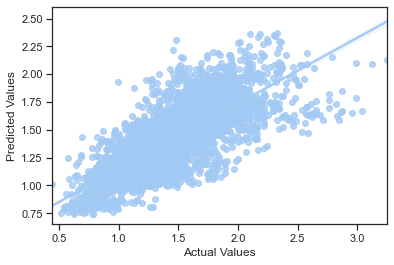

In [58]:
sns.regplot(y_val,val_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [59]:
#20. RMSE
from sklearn import metrics
MSE_train = metrics.mean_squared_error(y_train, train_pred)
MSE_val = metrics.mean_squared_error(y_val, val_pred)

In [60]:
RMSE_train = MSE_train**0.5
RMSE_val = MSE_val**0.5
print(RMSE_train)
print(RMSE_val)

0.2529365896212428
0.2616067756393702


In [61]:
print('Mean Absolute Error:', np.expm1(metrics.mean_absolute_error(y_val, val_pred)))
print('Mean Squared Error:', np.expm1(metrics.mean_squared_error(y_val, val_pred)))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, val_pred)))

Mean Absolute Error: 0.21457728531941248
Mean Squared Error: 0.07083434367276918


In [62]:
r2_train = metrics.r2_score(y_train,train_pred)
r2_val = metrics.r2_score(y_val,val_pred)

print("R2 score for training set is {}".format(r2_train))
print("R2 score for validation set is {}".format(r2_val))

R2 score for training set is 0.6082182976073792
R2 score for validation set is 0.584163332341023


In [63]:
coeffecients = pd.DataFrame(regressor.coef_,features_to_use)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Total Volume,-1.104259
region_Atlanta,0.066912
region_BaltimoreWashington,0.199122
region_Boise,-0.092980
region_Boston,0.164110
region_BuffaloRochester,0.040569
region_California,0.323178
region_Charlotte,0.118587
region_Chicago,0.231544
region_CincinnatiDayton,-0.021732
